<a href="https://colab.research.google.com/github/Dhamu785/AI-scratch/blob/main/PyTorch/02_NN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import libaries**

- **In torch 1st pass predictions then true values** - [Doc](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss)
- **In scikit-learn 1st true value and then prediction values** - [Doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

In [1]:
import pandas as pd
import numpy as np
import os
import torch as t
from torch import nn
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [4]:
t.__version__

'2.3.0+cu121'

In [5]:
t.cuda.is_available()

False

In [6]:
# t.cuda.current_device()

## **2. Generate and visualize the data - [plt](https://matplotlib.org/stable/users/explain/colors/colormaps.html)**

In [7]:
samples = 1_000
x, y = make_circles(samples, noise=0.06, random_state=23)

df = pd.DataFrame(x, columns=['x1', 'x2'])
df['labels'] = y
df.head()

,x1,x2,labels
0,0.766452,0.150913,1
1,-0.438011,-0.628714,1
2,-0.894626,0.477729,0
3,0.766914,0.290479,1
4,0.857829,-0.190005,1


In [8]:
pd.DataFrame(df['labels'].value_counts().reset_index())

,labels,count
0,1,500
1,0,500


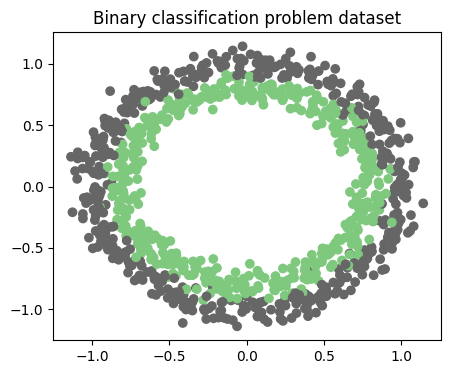

In [9]:
plt.figure(figsize=(5,4))
plt.scatter(df['x1'], df['x2'], c=y, cmap=plt.cm.Accent_r)
plt.title("Binary classification problem dataset")
plt.show()

## **3. Turn numpy array into tensors**

In [10]:
X = t.from_numpy(x).type(t.float)
y = t.from_numpy(y).type(t.float)

In [11]:
X.dtype, y.dtype

(torch.float32, torch.float32)

## **4. Train test split**

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"{len(x_train) = }, {len(x_test) = }, {len(y_train) = }, {len(y_test) = }")

len(x_train) = 800, len(x_test) = 200, len(y_train) = 800, len(y_test) = 200


## **5. Model building**

In [13]:
# Make device agnostic code

device = 'cuda' if t.cuda.is_available() else 'cpu'
device

'cpu'

### **5.1 By using class**

In [14]:
class circle_model0_class(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=8)
        self.layer2 = nn.Linear(in_features=8, out_features=1)

    def forward(self, x:t.Tensor):
        return self.layer2(self.layer1(x))

model0_class = circle_model0_class()
print(f"Location of the model = {next(model0_class.parameters()).device}")

# Change the model location
model0_class.to(device)
print(f"Model location = {next(model0_class.parameters()).device}")

Location of the model = cpu
Model location = cpu


In [15]:
model0_class

circle_model0_class(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=1, bias=True)
)

In [16]:
model0_class.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5389,  0.2398],
                      [-0.0865,  0.3025],
                      [-0.4700, -0.3601],
                      [ 0.1180,  0.6685],
                      [-0.2349, -0.0588],
                      [-0.6224,  0.2239],
                      [-0.4442,  0.5661],
                      [ 0.1104, -0.0342]])),
             ('layer1.bias',
              tensor([-0.3417,  0.5241, -0.4507, -0.0071,  0.0404,  0.5428, -0.3289,  0.0864])),
             ('layer2.weight',
              tensor([[ 0.1577,  0.3077,  0.2571,  0.2925,  0.3449, -0.0232, -0.1237, -0.0811]])),
             ('layer2.bias', tensor([0.2764]))])

In [17]:
list(model0_class.parameters())

[Parameter containing:
 tensor([[ 0.5389,  0.2398],
         [-0.0865,  0.3025],
         [-0.4700, -0.3601],
         [ 0.1180,  0.6685],
         [-0.2349, -0.0588],
         [-0.6224,  0.2239],
         [-0.4442,  0.5661],
         [ 0.1104, -0.0342]], requires_grad=True),
 Parameter containing:
 tensor([-0.3417,  0.5241, -0.4507, -0.0071,  0.0404,  0.5428, -0.3289,  0.0864],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.1577,  0.3077,  0.2571,  0.2925,  0.3449, -0.0232, -0.1237, -0.0811]],
        requires_grad=True),
 Parameter containing:
 tensor([0.2764], requires_grad=True)]

### **5.2 By using nn.sequential**

In [18]:
model0_squential = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1)
).to(device=device)

print("Model location = ", next(model0_squential.parameters()).device)
model0_squential

Model location =  cpu


Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [19]:
list(model0_squential.parameters())

[Parameter containing:
 tensor([[-0.5832, -0.5911],
         [ 0.6390, -0.2093],
         [ 0.0131, -0.4741],
         [-0.4122,  0.1455],
         [-0.0719, -0.1336],
         [ 0.5983, -0.0746],
         [-0.3329,  0.6940],
         [ 0.0694, -0.2700]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3774, -0.3950, -0.6932, -0.2568,  0.6443,  0.1610, -0.6206, -0.6378],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.2285,  0.0319,  0.2568,  0.1438, -0.2188, -0.0284,  0.2076,  0.1654]],
        requires_grad=True),
 Parameter containing:
 tensor([0.3198], requires_grad=True)]

### **5.3 Sequential in class**

In [20]:
class circle_model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            nn.Linear(in_features=8, out_features=1)
        )

    def forward(self,x):
        return self.layers(x)

model0_cls_seq = circle_model1()
model0_cls_seq

circle_model1(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [21]:
model0_cls_seq.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 0.6315,  0.6789],
                      [-0.4246, -0.2198],
                      [-0.2165, -0.0483],
                      [ 0.0202, -0.2372],
                      [ 0.1097,  0.3686],
                      [ 0.2415,  0.4154],
                      [-0.4125,  0.5344],
                      [ 0.1682,  0.5095]])),
             ('layers.0.bias',
              tensor([-0.0135, -0.0613,  0.1002,  0.3406, -0.5991, -0.4454, -0.2047,  0.0176])),
             ('layers.1.weight',
              tensor([[ 0.2433,  0.1105,  0.3116, -0.1304, -0.1035, -0.1505, -0.0142, -0.0899]])),
             ('layers.1.bias', tensor([0.3011]))])

### **5.4 Making prediction without training**

In [22]:
with t.inference_mode():
    untrained_pred = model0_cls_seq(x_test)

print(f"Shapes\n {x_train.shape = } \n {x_test.shape = } \n {y_train.shape = }\n {y_test.shape = }\n {untrained_pred.shape = }")
print(f"\nPredictions = {t.round(untrained_pred[:5]).squeeze()}")
print(f"Actual = {y_test[:5]}")

Shapes
 x_train.shape = torch.Size([800, 2]) 
 x_test.shape = torch.Size([200, 2]) 
 y_train.shape = torch.Size([800])
 y_test.shape = torch.Size([200])
 untrained_pred.shape = torch.Size([200, 1])

Predictions = tensor([0., 0., 0., 0., 0.])
Actual = tensor([1., 1., 0., 0., 1.])


### **5.5 Settingup the loss function, optimizer and accuracy**
1. `tensor.item()` - to get number from the tensor.

In [23]:
# Loss function

loss_fun = nn.BCEWithLogitsLoss()

In [24]:
# Optimizer

optimizer = t.optim.SGD(model0_cls_seq.parameters(), lr=0.01)

In [25]:
z = t.tensor([7])
z.item()

7

In [26]:
# Writting the accuracy function

def cal_accuracy(y_true, pred):
    crt = t.eq(y_true, pred).sum().item()
    accuracy = (crt/len(y_true))*100
    return accuracy

## **6. Training**

### **6.1 Model predictions without training**

`from logits` -> `prediction_probability` -> `labels`

In [27]:
# from logits

with t.inference_mode():
    untrained_pred = model0_cls_seq(x_test)

untrained_pred[:5]

tensor([[0.4016],
        [0.4207],
        [0.3942],
        [0.4277],
        [0.4250]])

In [28]:
# Prediction probability with activation function

pred_prob = t.sigmoid(untrained_pred)
pred_prob[:5]

tensor([[0.5991],
        [0.6036],
        [0.5973],
        [0.6053],
        [0.6047]])

In [29]:
# labels

t.round(pred_prob)[:5], y_test[:5]

(tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.]]),
 tensor([1., 1., 0., 0., 1.]))

In [30]:
with t.inference_mode():
    predictions = t.round(t.sigmoid(model0_cls_seq(x_test)))

print(predictions[:2])
t.eq(predictions.squeeze(), y_test).sum()

tensor([[1.],
        [1.]])


tensor(107)

### **6.2 Training and testing loop**

In [31]:
device

'cpu'

In [32]:
loss_fun, optimizer

(BCEWithLogitsLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [44]:
# setting random seed
t.manual_seed(42)
t.cuda.manual_seed(42)

# Moving tensors to the target device
x_train, x_test = x_train.to(device), x_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

print(f"{x_train.device = }, {x_test.device = }")
print(f"{y_train.device = }, {y_test.device = }\n")

# Training loop
epochs = 100
for i in range(epochs):
    # Setting to training mode
    model0_cls_seq.train()

    # Forward pass
    y_pred = model0_cls_seq(x_train).squeeze()
    y_prob = t.round(t.sigmoid(y_pred))

    # Loss/Accuracy
    ls = loss_fun(y_pred, y_train)
    acc = cal_accuracy(y_train, y_prob)

    # zero grad
    optimizer.zero_grad()

    # Back propagation
    ls.backward()

    # Gradiebt descent
    optimizer.step()

    # Test calculations
    model0_cls_seq.eval()
    with t.inference_mode():
        test_pre = model0_cls_seq(x_test).squeeze()
        tst_pre = t.round(t.sigmoid(test_pre))

        test_loss = loss_fun(test_pre, y_test)
        test_acc = cal_accuracy(y_test, tst_pre)

    if i % 10 == 0:
        print(f"Epoch-{i}/{epochs}  train-loss={ls}  train-acc={acc:.2f}%  test-loss={test_loss}  test-acc={test_acc:.2f}%")

x_train.device = device(type='cpu'), x_test.device = device(type='cpu')
y_train.device = device(type='cpu'), y_test.device = device(type='cpu')

Epoch-0/100  train-loss=0.694348156452179  train-acc=54.37%  test-loss=0.6940438151359558  test-acc=56.50%
Epoch-10/100  train-loss=0.6942320466041565  train-acc=54.12%  test-loss=0.6941441297531128  test-acc=54.00%
Epoch-20/100  train-loss=0.6941266059875488  train-acc=53.37%  test-loss=0.6942431926727295  test-acc=54.00%
Epoch-30/100  train-loss=0.6940305829048157  train-acc=53.12%  test-loss=0.6943405270576477  test-acc=51.50%
Epoch-40/100  train-loss=0.6939433813095093  train-acc=53.37%  test-loss=0.6944358348846436  test-acc=50.00%
Epoch-50/100  train-loss=0.6938640475273132  train-acc=53.25%  test-loss=0.6945288777351379  test-acc=50.00%
Epoch-60/100  train-loss=0.6937917470932007  train-acc=52.62%  test-loss=0.6946195363998413  test-acc=50.50%
Epoch-70/100  train-loss=0.6937258243560791  train-acc=51.62%  test-loss=0.6947073936462402  t

In [34]:
x_train.device

device(type='cpu')

## **7. Model evaluation**

### **7.1 Visualize the predication data**

In [35]:
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [36]:
def plot_classification(model0_cls_seq=model0_cls_seq):
    plt.figure(figsize=(13,4.5))
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    data = t.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).type(t.float)

    with t.inference_mode():
        y_pred = model0_cls_seq(data).squeeze()

    plt.subplot(1,2,1)
    y_pred = t.round(t.sigmoid(y_pred))
    plt.contourf(xx, yy, y_pred.detach().numpy().reshape(xx.shape), cmap=plt.cm.Accent_r, alpha=0.8)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=40, cmap='bone')
    plt.title("Train data")
    plt.colorbar()

    with t.inference_mode():
        y_pred = model0_cls_seq(data).squeeze()

    plt.subplot(1,2,2)
    y_pred = t.round(t.sigmoid(y_pred))
    plt.contourf(xx, yy, y_pred.detach().numpy().reshape(xx.shape), cmap=plt.cm.Accent_r, alpha=0.8)
    plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=40, cmap='bone')
    plt.title("Test data")
    plt.colorbar()
    plt.show()

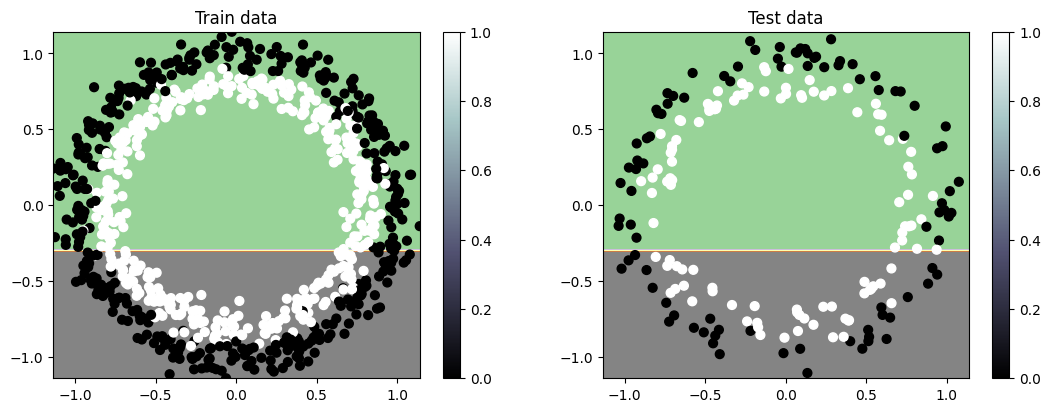

In [45]:
plot_classification()

## **8. Model improvement**

### **8.1 Build the model**

In [38]:
class circlem2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 8)
        self.layer2 = nn.Linear(8, 24)
        self.layer3 = nn.Linear(24, 36)
        self.layer4 = nn.Linear(36, 1)

    def forward(self, x):
        z = self.layer1(x)
        z = self.layer2(z)
        z = self.layer3(z)
        z = self.layer4(z)

        # return self.layer4(self.layer3(self.layer2(self.layer1(x))))
        return z

model_1 = circlem2()
model_1

circlem2(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=24, bias=True)
  (layer3): Linear(in_features=24, out_features=36, bias=True)
  (layer4): Linear(in_features=36, out_features=1, bias=True)
)

In [39]:
# Setting the loss function and optimizer

ls_fun = nn.BCEWithLogitsLoss()

opt = t.optim.SGD(model_1.parameters(), lr=0.01)

### **8.2 Training loop and model evaluation**

In [53]:
t.manual_seed(42)
t.cuda.manual_seed(42)

x_train, x_test = x_train.to(device), x_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

epochs=1000

for epoch in range(1, epochs+1):
    model_1.train()
    preds_logits = model_1(x_train).squeeze()
    preds = t.round(t.sigmoid(preds_logits))

    acc = cal_accuracy(y_train, preds)
    ls = ls_fun(preds_logits, y_train)

    opt.zero_grad()

    ls.backward()

    opt.step()

    model_1.eval()
    with t.inference_mode():
        test_logits = model_1(x_test).squeeze()
        test_preds = t.round(t.sigmoid(test_logits))

        test_acc = cal_accuracy(y_test, test_preds)
        test_ls = ls_fun(test_logits, y_test)

    if epoch % 100 == 0:
        print(f"{epoch = } | {acc = }, loss = {ls:.2f} | {test_acc = }, {test_ls = }")

epoch = 100 | acc = 47.25, loss = 0.69 | test_acc = 43.0, test_ls = tensor(0.6957)
epoch = 200 | acc = 47.125, loss = 0.69 | test_acc = 43.0, test_ls = tensor(0.6957)
epoch = 300 | acc = 47.125, loss = 0.69 | test_acc = 43.0, test_ls = tensor(0.6957)
epoch = 400 | acc = 47.125, loss = 0.69 | test_acc = 43.0, test_ls = tensor(0.6957)
epoch = 500 | acc = 47.125, loss = 0.69 | test_acc = 43.0, test_ls = tensor(0.6957)
epoch = 600 | acc = 47.125, loss = 0.69 | test_acc = 43.0, test_ls = tensor(0.6957)
epoch = 700 | acc = 47.125, loss = 0.69 | test_acc = 43.0, test_ls = tensor(0.6957)
epoch = 800 | acc = 47.125, loss = 0.69 | test_acc = 43.0, test_ls = tensor(0.6957)
epoch = 900 | acc = 47.25, loss = 0.69 | test_acc = 43.0, test_ls = tensor(0.6957)
epoch = 1000 | acc = 47.25, loss = 0.69 | test_acc = 43.0, test_ls = tensor(0.6957)


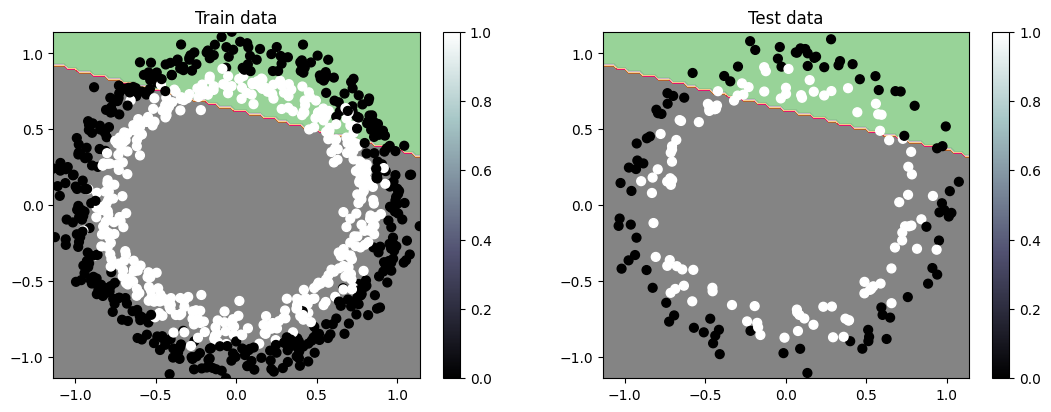

In [54]:
plot_classification(model_1)

### **8.3 Introducing the non-linearity to evaluation**

In [64]:
# Model building

class circle_m3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 16)
        self.layer2 = nn.Linear(16, 52)
        self.layer3 = nn.Linear(52, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.activation(self.layer2(self.activation(self.layer1(x)))))

model_2 = circle_m3()
model_2

circle_m3(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=52, bias=True)
  (layer3): Linear(in_features=52, out_features=1, bias=True)
  (activation): ReLU()
)

In [65]:
# Setting up the loss function and optimizers

ls_fun = nn.BCEWithLogitsLoss()
optim = t.optim.Adam(model_2.parameters(), lr=0.01)

In [66]:
# Traing and testing loop

epochs = 100
for epoch in range(1,epochs+1):
    model_2.train()

    preds = model_2(x_train).squeeze()
    pred_prob = t.round(t.sigmoid(preds))

    loss = ls_fun(preds, y_train)
    accuracy = cal_accuracy(y_train, pred_prob)

    optim.zero_grad()

    loss.backward()

    optim.step()

    model_2.eval()
    with t.inference_mode():
        test_pred = model_2(x_test).squeeze()
        test_prob = t.round(t.sigmoid(test_pred))
        test_loss = ls_fun(test_pred, y_test)
        test_accuracy = cal_accuracy(y_test, test_prob)
    if epoch % 10 == 0:
        print(f"Epochs = {epoch}/{epochs} | Train-loss:{loss:.2f} | accuracy:{accuracy:.2f} | Test-loss:{test_loss:.2f} | accuracy:{test_accuracy:.2f}")

Epochs = 10/100 | Train-loss:0.66 | accuracy:68.12 | Test-loss:0.67 | accuracy:65.00
Epochs = 20/100 | Train-loss:0.57 | accuracy:83.75 | Test-loss:0.58 | accuracy:86.50
Epochs = 30/100 | Train-loss:0.41 | accuracy:93.50 | Test-loss:0.41 | accuracy:91.50
Epochs = 40/100 | Train-loss:0.25 | accuracy:95.25 | Test-loss:0.26 | accuracy:92.50
Epochs = 50/100 | Train-loss:0.17 | accuracy:95.12 | Test-loss:0.20 | accuracy:91.50
Epochs = 60/100 | Train-loss:0.13 | accuracy:95.62 | Test-loss:0.18 | accuracy:92.00
Epochs = 70/100 | Train-loss:0.12 | accuracy:95.62 | Test-loss:0.17 | accuracy:92.50
Epochs = 80/100 | Train-loss:0.11 | accuracy:95.62 | Test-loss:0.17 | accuracy:92.00
Epochs = 90/100 | Train-loss:0.11 | accuracy:96.25 | Test-loss:0.17 | accuracy:92.50
Epochs = 100/100 | Train-loss:0.10 | accuracy:96.12 | Test-loss:0.17 | accuracy:92.50


In [71]:
print(f"{test_prob[:10] = }\n{y_test[:10] = }")

test_prob[:10] = tensor([1., 1., 1., 0., 1., 0., 0., 1., 1., 0.])
y_test[:10] = tensor([1., 1., 0., 0., 1., 0., 0., 1., 1., 0.])


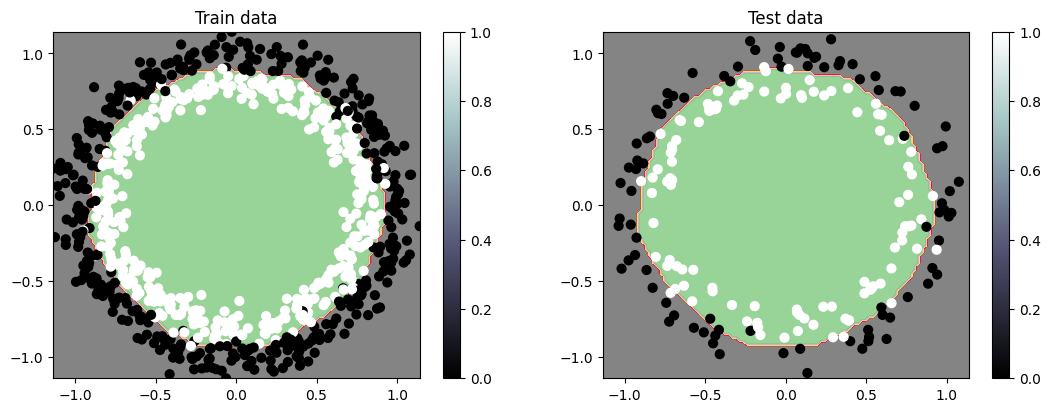

In [67]:
# @title Select model for visualization { run: "auto", vertical-output: true, form-width: "50%", display-mode: "form" }
model = model_2 # @param ["model_1", "model_2", "model0_cls_seq"] {type:"raw", allow-input: true}

plot_classification(model)












## **9 Recreation of activation functions**

### **9.1 ReLU**

In [79]:
a = t.arange(-10, 10, 1, dtype=t.float32)
a, t.relu(a)

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
         8., 9.]))

In [100]:
def relu(x:t.Tensor):
    return t.maximum(t.tensor(0), x)

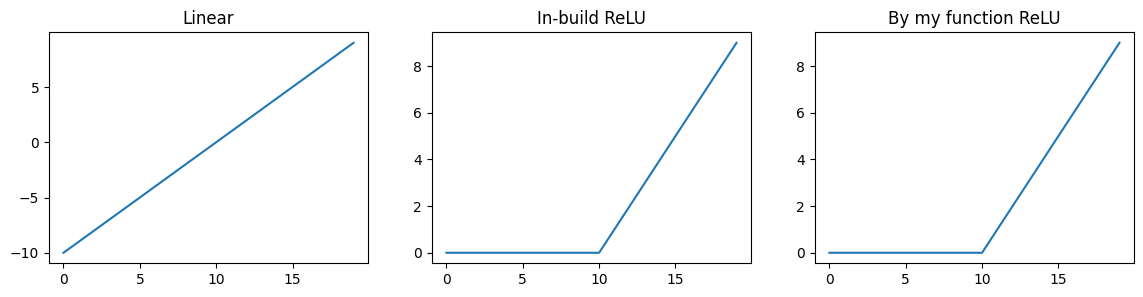

In [104]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
plt.plot(a)
plt.title('Linear')
plt.subplot(1,3,2)
plt.plot(t.relu(a))
plt.title("In-build ReLU")
plt.subplot(1,3,3)
plt.title("By my function ReLU")
plt.plot(relu(a));

### **9.2 Sigmoid**

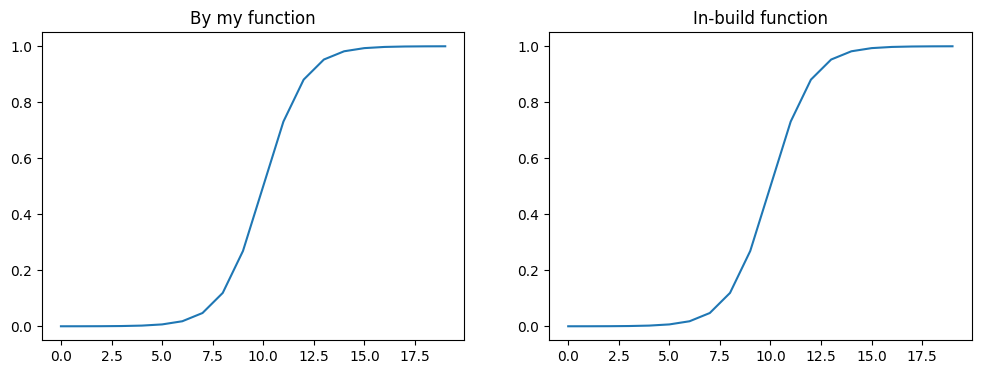

In [99]:
def sigmoid(x:t.Tensor):
    return 1 / (1+t.exp(-x))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(sigmoid(a));
plt.title("By my function")
plt.subplot(1,2,2)
plt.plot(t.sigmoid(a))
plt.title("In-build function");

---